In [288]:
from datetime import datetime
import random
from person import Person
from matplotlib import pyplot as plt
from propagator import Propagator, Results


def plot_results(results: Results):
    fig = plt.figure(dpi=200)

    # plt.yscale('log')
    plt.xlabel("Day")
    plt.ylabel("People")
    infected = plt.plot(results.day, results.infected_count)
    dead = plt.plot(results.day, [dead*10 for dead in results.dead_count])
    recovered = plt.plot(results.day, results.recovered_count)

    plt.legend(["Infected", "Dead x 10", "Recovered"])
    plt.grid()


def initialize_population(n_people, n_contacts, n_infected, n_immune=0):

    people: [Person] = []
    for _ in range(n_people):
        people.append(Person())

    for person in people:
        person.contacts = random.sample(people, n_contacts)

    initial_infected = random.sample(people, n_infected)
    for initial_infected_person in initial_infected:
        initial_infected_person.infected = True

    immune = random.sample(people, n_immune)
    for immune_person in immune:
        immune_person.infected = False
        immune_person.recovered = True

    return people

$R_0 \sim \ $ $N_c$ (number of daily contacts)

$\qquad\times$ $r\ \ \,$ (probability of transmission for contact)

$\qquad\times$ $\tau\ \ \,$ (length of infection in days)

$r = R_0/\left(N_c \tau\right)$

Text(0.5, 1.0, '10000 People, 5 contacts, $R_0=$ 2.5')

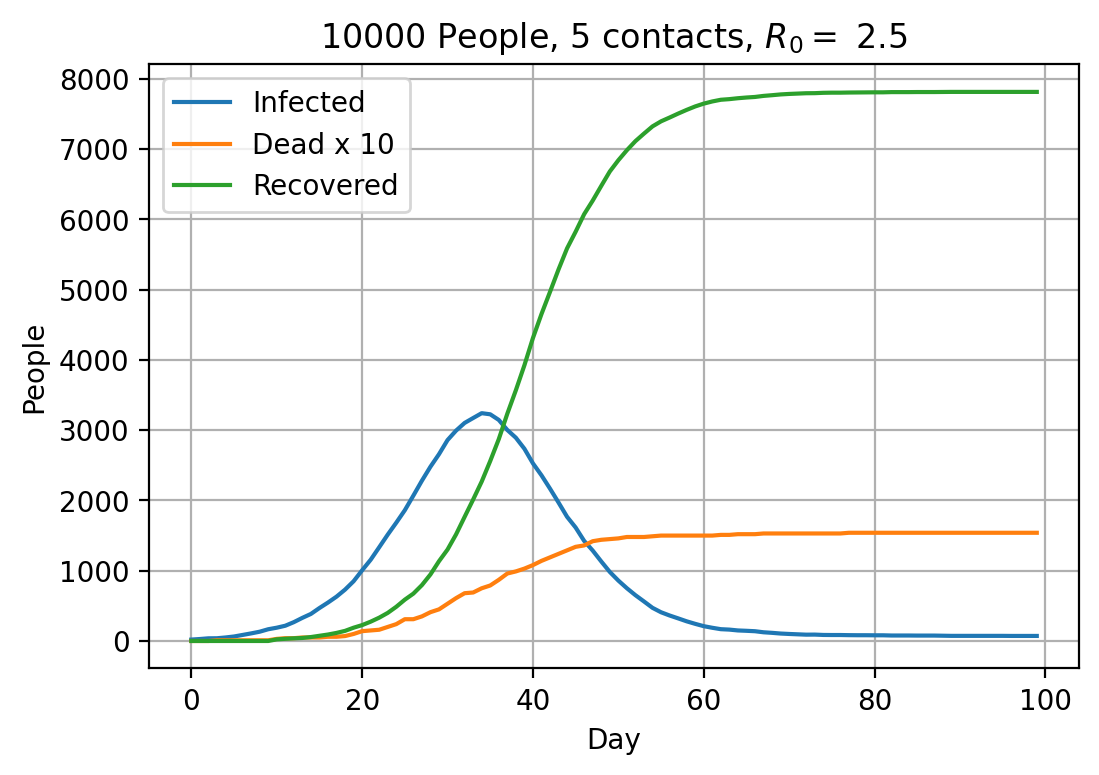

In [290]:
n_people = 10000
R0 = 2.5
n_contacts = 5
infection_length = 10
transmission_probability = R0/(n_contacts*infection_length)

mortality = 0.02
daily_mortality = mortality/infection_length

random.seed(datetime.now())
people = initialize_population(n_people, n_contacts=n_contacts, n_infected=20)
propagator = Propagator(people, transmission_probability, infection_length, daily_mortality)

propagator.step_n(100)

plot_results(propagator.results)
plt.title("%d People, %d contacts, $R_0=$%4.1f" % (n_people, n_contacts, R0))


Text(0, 0.5, 'Total Infected of 10000')

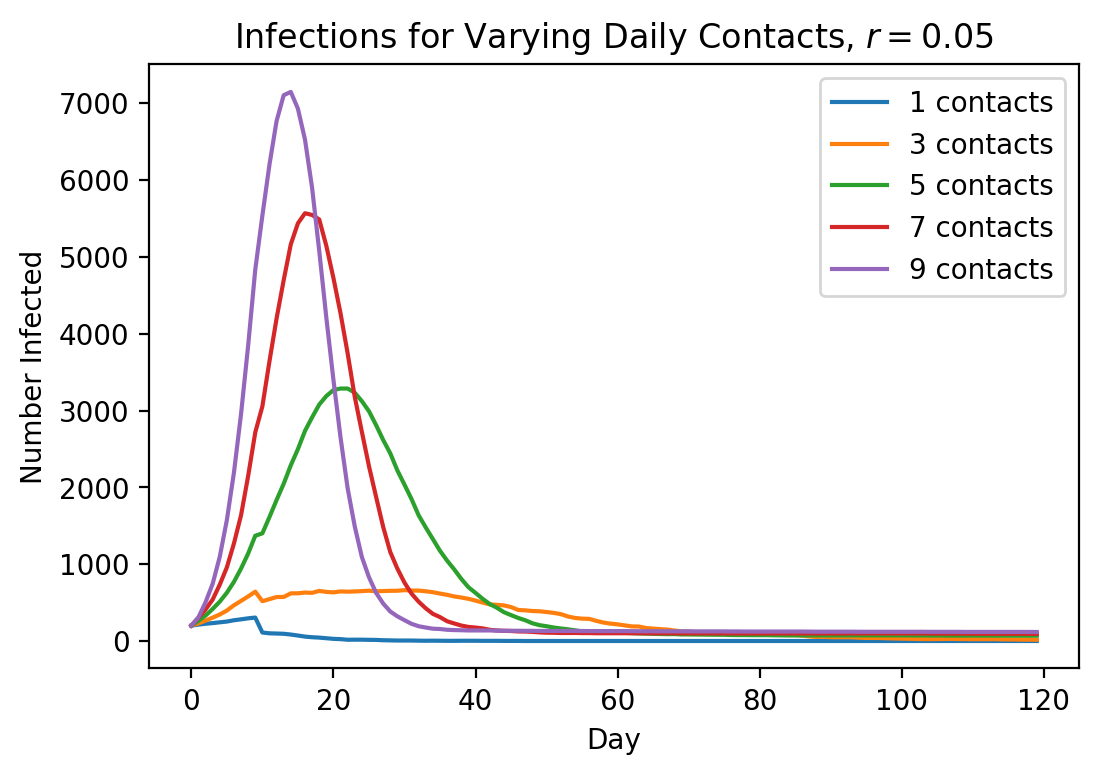

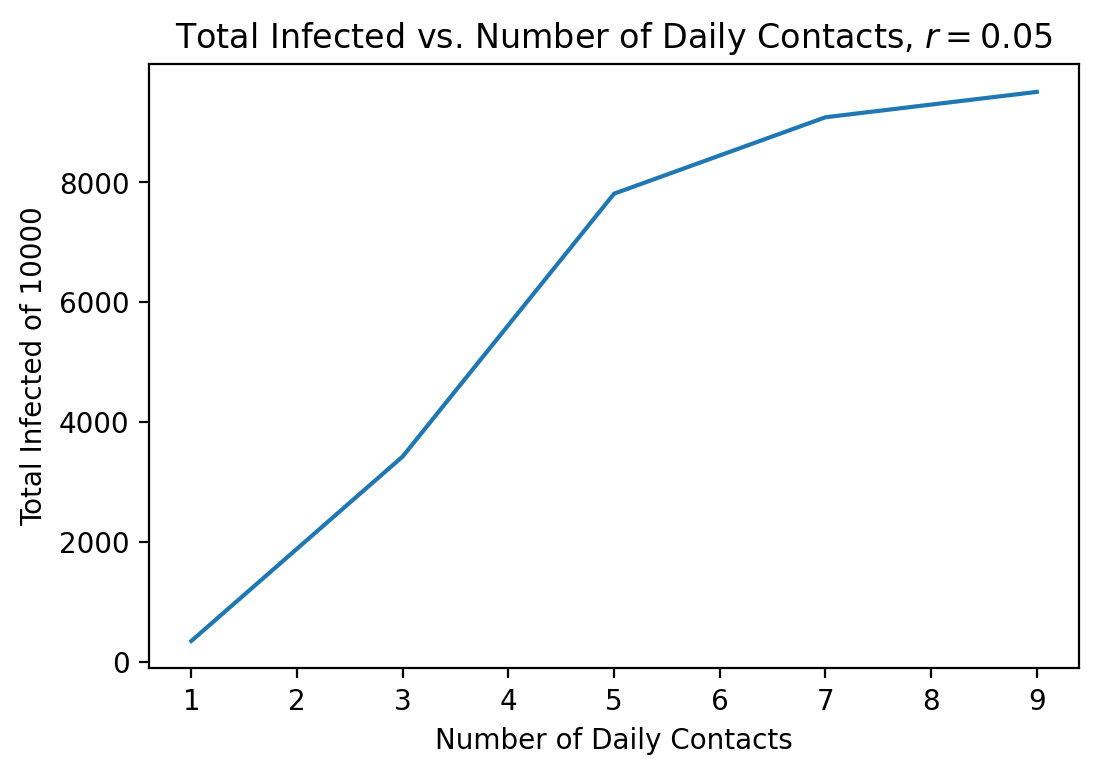

In [304]:
n_people = 10000
infection_length = 10
R0 = 2.5
transmission_probability = R0/(5*infection_length)

mortality = 0.02
daily_mortality = mortality/infection_length

n_contacts_runs = []
infected_runs = []
recovered_runs = []
days = []

for n_contacts in range(1,10,2):
    random.seed(datetime.now())
    people = initialize_population(n_people, n_contacts=n_contacts, n_infected=200)
    propagator = Propagator(people, transmission_probability, infection_length, daily_mortality)
    propagator.step_n(120)

    n_contacts_runs.append(n_contacts)
    day = propagator.results.day
    infected_runs.append(propagator.results.infected_count)
    recovered_runs.append(propagator.results.recovered_count[-1])

legend_labels = []
plt.figure(dpi=200)
for infected_index in range(len(infected_runs)):
    daily_infected = infected_runs[infected_index]
    n_contacts = n_contacts_runs[infected_index]
    plt.plot(day, daily_infected)
    legend_labels.append("{} contacts".format(n_contacts))

plt.title("Infections for Varying Daily Contacts, $r=${:4.2f}".format(transmission_probability))
plt.xlabel("Day")
plt.ylabel("Number Infected")
#plt.yscale('log')
plt.legend(legend_labels)


plt.figure(dpi=200)
plt.title("Total Infected vs. Number of Daily Contacts, $r=${:4.2f}".format(transmission_probability))
plt.plot(n_contacts_runs, recovered_runs)
plt.xlabel("Number of Daily Contacts")
plt.ylabel("Total Infected of %d" % n_people)

Text(0, 0.5, 'Total Infected of 10000')

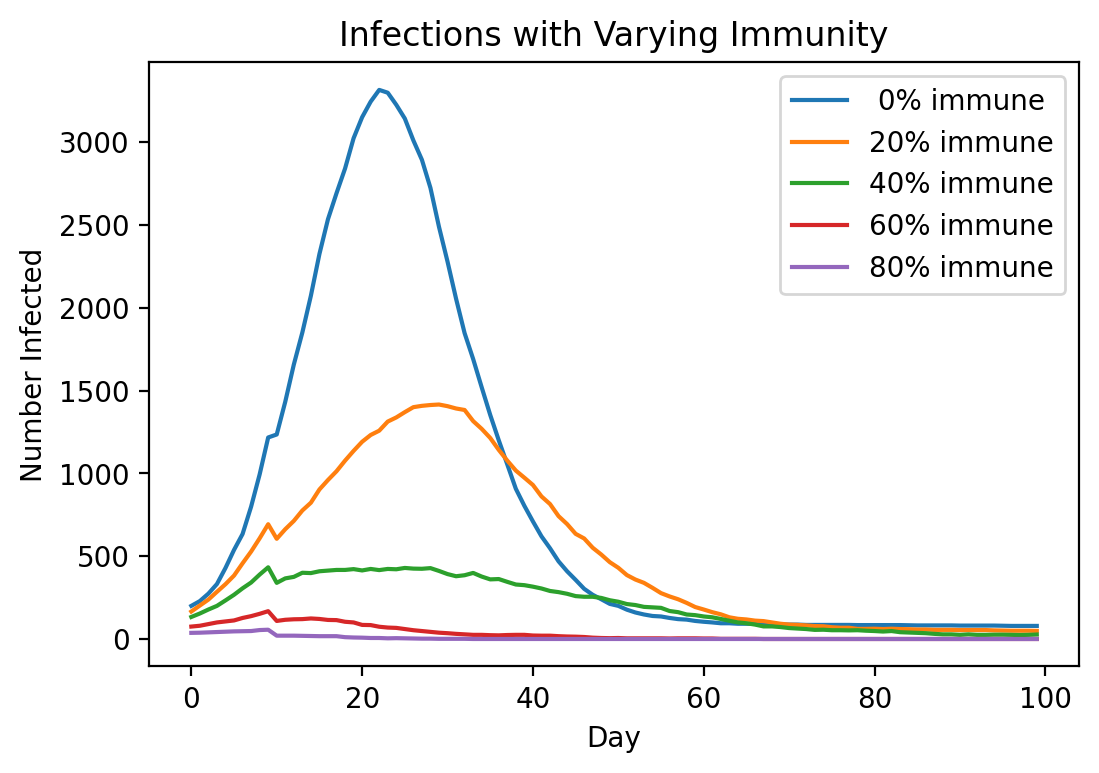

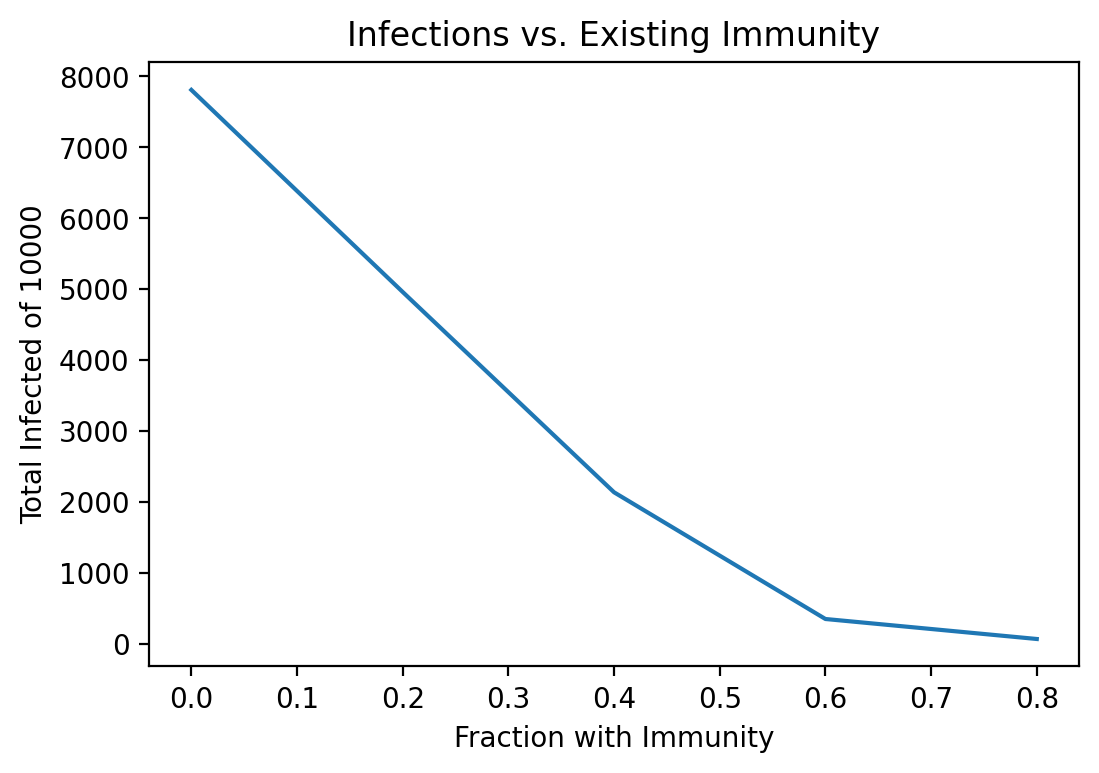

In [300]:
n_people = 10000
R0 = 2.5
infection_length = 10
n_contacts = 5
transmission_probability = R0/(n_contacts*infection_length)

mortality = 0.02
daily_mortality = mortality/infection_length

fraction_immune_runs = [0.0, 0.2, 0.4, 0.6, 0.8]
infected_runs = []
recovered_runs = []
day

legend_labels = []

for fraction_immune in fraction_immune_runs:
    random.seed(datetime.now())
    n_immune = int(n_people*fraction_immune)
    people = initialize_population(n_people, n_contacts=n_contacts, n_infected=200, n_immune=n_immune)
    propagator = Propagator(people, transmission_probability, infection_length, daily_mortality)
    propagator.step_n(100)
    infected_runs.append(propagator.results.infected_count)
    recovered_runs.append(propagator.results.recovered_count[-1]-n_immune)
    day = propagator.results.day


plt.figure(dpi=200)
for infected_index in range(len(infected_runs)):
    daily_infected = infected_runs[infected_index]
    fraction_immune = fraction_immune_runs[infected_index]
    plt.plot(day, daily_infected)
    legend_labels.append("{:2.0f}% immune".format(fraction_immune*100))

plt.title("Infections with Varying Immunity")
plt.xlabel("Day")
plt.ylabel("Number Infected")
plt.legend(legend_labels)


plt.figure(dpi=200)
plt.plot(fraction_immune_runs, recovered_runs)
plt.title("Infections vs. Existing Immunity")
plt.xlabel("Fraction with Immunity")
plt.ylabel("Total Infected of %d" % n_people)


